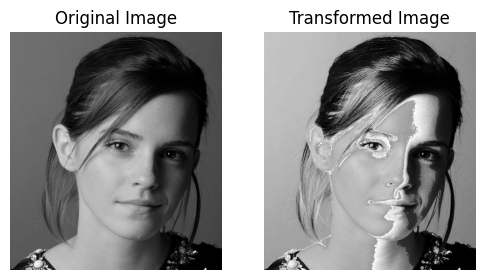

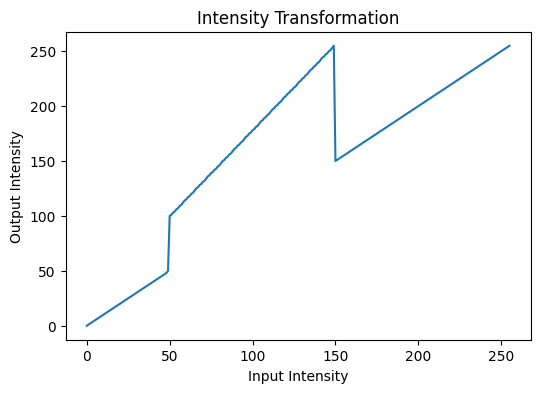

In [68]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plyt

img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/emma.jpg", cv.IMREAD_GRAYSCALE)

tran1 = np.linspace(0, 50, 50).astype(np.uint8)
tran2 = np.linspace(100, 255, 100).astype(np.uint8)
tran3 = np.linspace(150, 255, 106).astype(np.uint8)

tran = np.concatenate((tran1, tran2), axis=0).astype(np.uint8)
tran = np.concatenate((tran, tran3), axis=0).astype(np.uint8)
new_img = tran[img]

fig, ax = plyt.subplots(1, 2, figsize=(6, 4))

ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")

ax[1].imshow(new_img, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title("Transformed Image")

for j in range(2):
    ax[j].axis('off')

fig, ax = plyt.subplots(figsize=(6, 4))
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.plot(tran)

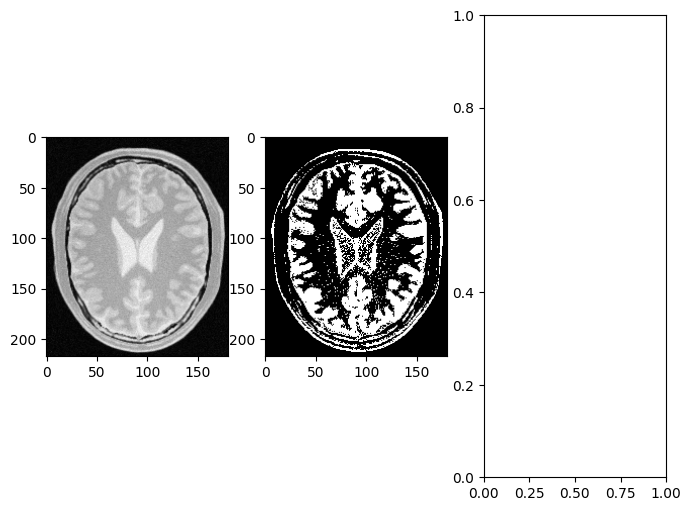

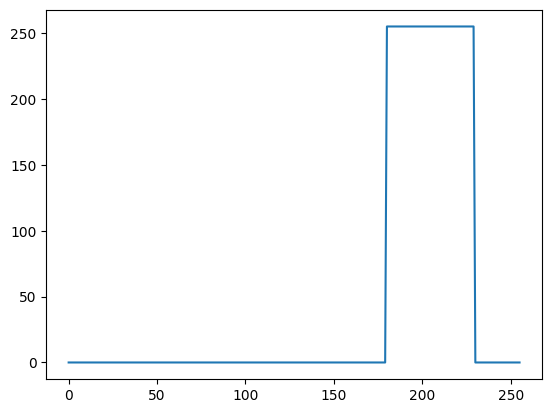

In [46]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

tran1 = np.linspace(0, 0, 180).astype(np.uint8)
tran2 = np.linspace(255, 255, 50).astype(np.uint8)
tran3 = np.linspace(0, 0, 26).astype(np.uint8)

tran = np.concatenate((tran1, tran2, tran3), axis=0).astype(np.uint8)

new_img = tran[img]

fig, ax = plyt.subplots(1, 3, figsize=(8, 6))
ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[1].imshow(new_img, cmap='gray', vmin = 0, vmax = 255)

fig, ax = plyt.subplots()
ax.plot(tran)

In [15]:
img[50,80]

154

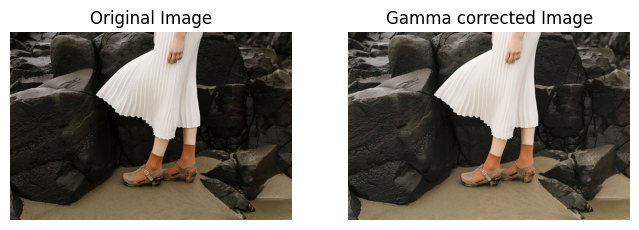

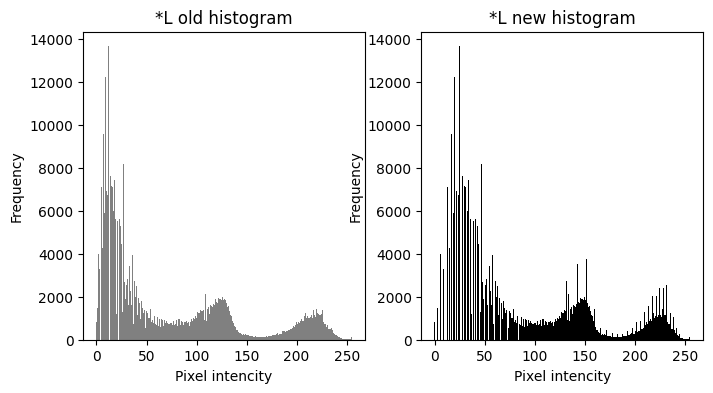

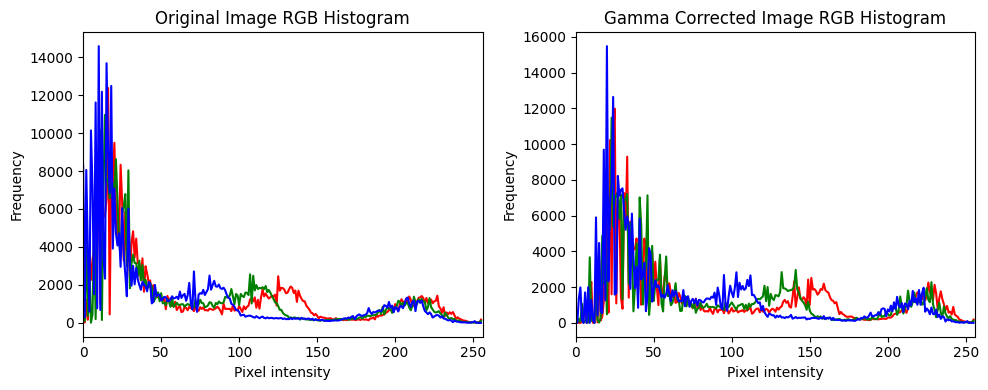

In [122]:
#3 gama for L plane
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/highlights_and_shadows.jpg")

img_lab_original = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_lab = img_lab_original.copy()

l_plane = img_lab[:, :, 0]
gamma = 0.75
tran = np.array([(p/255)**gamma * 255 for p in range(0, 256)]).astype(np.uint8)
new_l = tran[l_plane]

img_lab[:, :, 0] = new_l

hist_l = cv.calcHist([img_lab_original], [0], None, [256], [0, 256])
hist_l_new = cv.calcHist([img_lab], [0], None, [256], [0, 256])

hist_l = np.array(hist_l).flatten()
hist_l_new = np.array(hist_l_new).flatten()

img_original = cv.cvtColor(img_lab_original, cv.COLOR_LAB2RGB)
img_gamma_corr = cv.cvtColor(img_lab, cv.COLOR_LAB2RGB)

#Display Images
fig, ax = plyt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_original)
ax[0].set_title("Original Image")

ax[1].imshow(img_gamma_corr)
ax[1].set_title("Gamma corrected Image")

for j in range(2):
    ax[j].axis('off')

bins = np.arange(256) 

fig, ax = plyt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title("*L old histogram")
ax[0].set_xlabel("Pixel intencity")
ax[0].set_ylabel("Frequency")
ax[0].bar(bins, hist_l, width=1.0, color='gray')

ax[1].set_title("*L new histogram")
ax[1].set_xlabel("Pixel intencity")
ax[1].set_ylabel("Frequency")
ax[1].bar(bins, hist_l_new, width=1.0, color='black')

fig, ax = plyt.subplots(1, 2, figsize=(10, 4))
colors = ('r', 'g', 'b')

for i, col in enumerate(colors):
    hist = cv.calcHist([img_original], [i], None, [256], [0, 256])
    ax[0].plot(hist, color=col)
    ax[0].set_xlim([0, 256])
ax[0].set_title("Original Image RGB Histogram")
ax[0].set_xlabel("Pixel intensity")
ax[0].set_ylabel("Frequency")

for i, col in enumerate(colors):
    hist = cv.calcHist([img_gamma_corr], [i], None, [256], [0, 256])
    ax[1].plot(hist, color=col)
    ax[1].set_xlim([0, 256])
ax[1].set_title("Gamma Corrected Image RGB Histogram")
ax[1].set_xlabel("Pixel intensity")
ax[1].set_ylabel("Frequency")
plyt.tight_layout()
plyt.show()

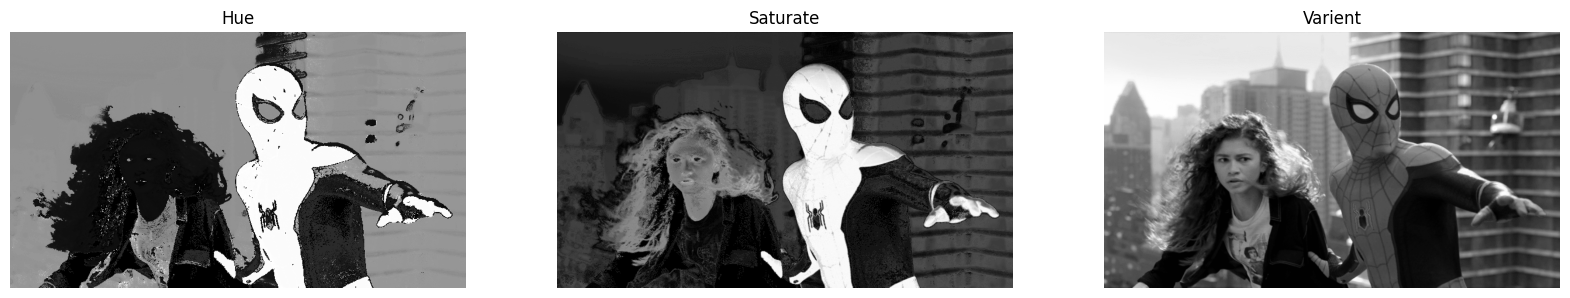

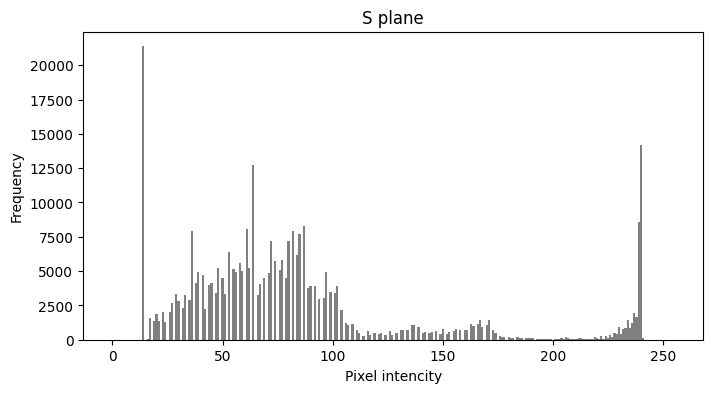

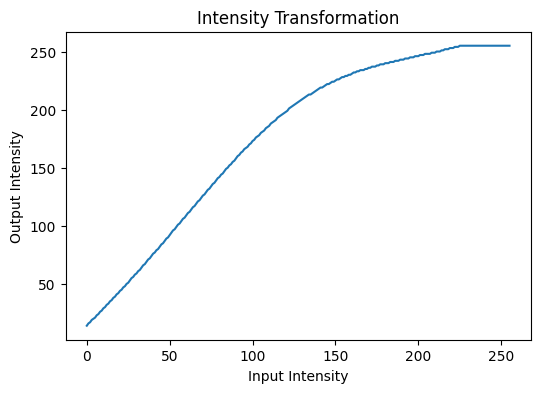

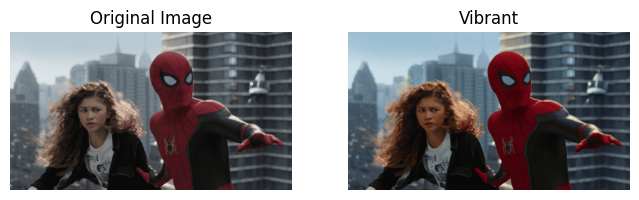

In [121]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/spider.png")
img_old = img.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)


img_h = img[:, :, 0]
img_s = img[:, :, 1]
img_v = img[:, :, 2]

fig, ax = plyt.subplots(1, 3, figsize=(20, 30))
ax[0].imshow(img_h, cmap ='gray')
ax[0].set_title("Hue")

ax[1].imshow(img_s, cmap = 'gray')
ax[1].set_title("Saturate")

ax[2].imshow(img_v, cmap = 'gray')
ax[2].set_title("Varient")

for j in range(3):
    ax[j].axis('off')


tran = np.zeros(256)
a = 0.62
sigma = 70

for i in range(256):
    term = i + a*128*np.exp(-((i - 128)**2) / (2 * sigma**2))
    tran[i] = np.minimum(term, 255)

tran = tran.astype(np.uint8)
img_s_new = tran[img_s]
img = cv.merge ([img_h , img_s_new , img_v])


hist_s = cv.calcHist([img], [1], None, [256], [0, 256])
hist_s = np.array(hist_s).flatten()

bins = np.arange(256) 
fig, ax = plyt.subplots(figsize=(8, 4))
ax.set_title("S plane")
ax.set_xlabel("Pixel intencity")
ax.set_ylabel("Frequency")
ax.bar(bins, hist_s, width=1.0, color='gray')

fig, ax = plyt.subplots(figsize=(6, 4))
ax.set_title("Intensity Transformation")
ax.set_xlabel("Input Intensity")
ax.set_ylabel("Output Intensity")
ax.plot(tran)

img = cv.cvtColor(img, cv.COLOR_HSV2RGB)
img_old = cv.cvtColor(img_old, cv.COLOR_BGR2RGB)
#Display Images
fig, ax = plyt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(img_old)
ax[0].set_title("Original Image")

ax[1].imshow(img)
ax[1].set_title("Vibrant")

for j in range(2):
    ax[j].axis('off')


In [168]:
def equlizehist(img):
    L = 256
    M,N = img.shape
    
    hist = cv.calcHist([img], [0], None, [L], [0, L])
    cdf = hist.cumsum()
    
    tran = np.array([(L-1)/(M*N)*cdf[k] for k in range(L)]).astype("uint8")
    g = tran[img]

    return g

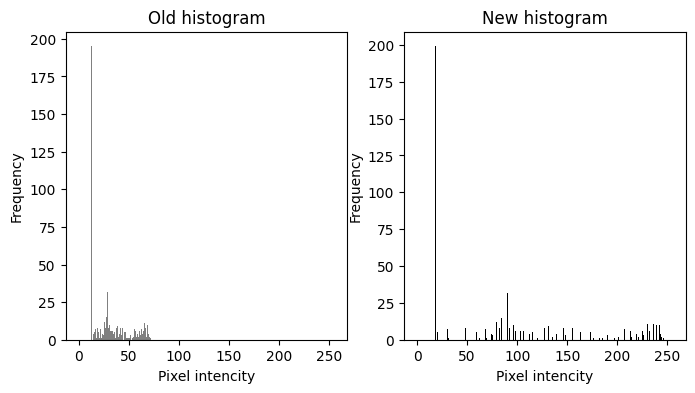

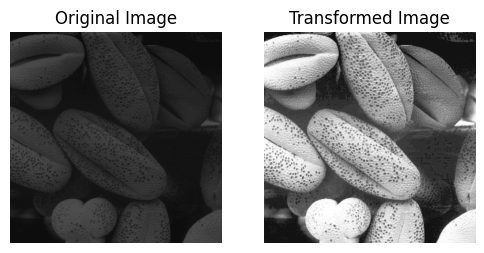

In [169]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/shells.tif", cv.IMREAD_GRAYSCALE)

hist_original = cv.calcHist(img, [0], None, [256], [0, 256])
hist_original = np.array(hist_original).flatten()

img_new = equlizehist(img)

hist_new = cv.calcHist(img_new, [0], None, [256], [0, 256])
hist_new = np.array(hist_new).flatten()

bins = np.arange(256) 

fig, ax = plyt.subplots(1, 2, figsize=(8, 4))
ax[0].set_title("Old histogram")
ax[0].set_xlabel("Pixel intencity")
ax[0].set_ylabel("Frequency")
ax[0].bar(bins, hist_original, width=1.0, color='gray')

ax[1].set_title("New histogram")
ax[1].set_xlabel("Pixel intencity")
ax[1].set_ylabel("Frequency")
ax[1].bar(bins, hist_new, width=1.0, color='black')

fig, ax = plyt.subplots(1, 2, figsize=(6, 4))
ax[0].imshow(img, cmap='gray', vmin = 0, vmax = 255)
ax[0].set_title("Original Image")

ax[1].imshow(img_new, cmap='gray', vmin = 0, vmax = 255)
ax[1].set_title("Transformed Image")

for j in range(2):
    ax[j].axis('off')

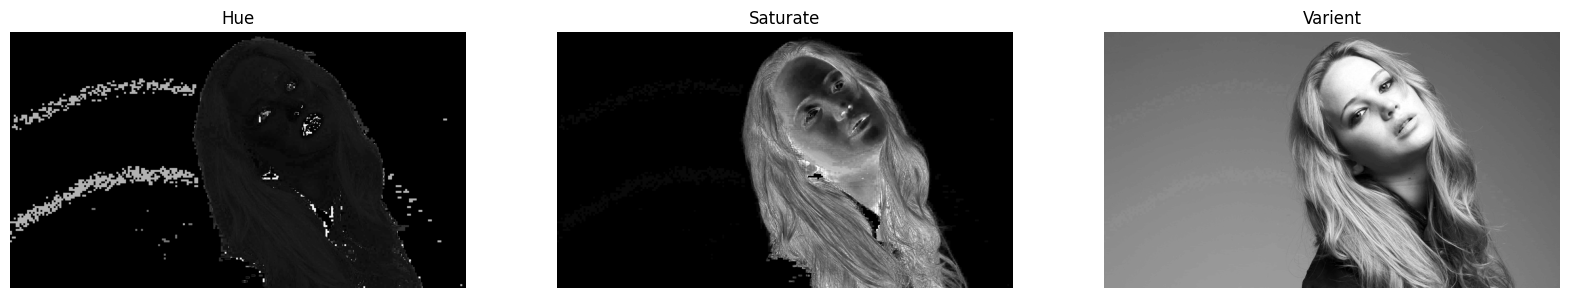

In [170]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/jeniffer.jpg")
img_old = img.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2HSV)


img_h = img[:, :, 0]
img_s = img[:, :, 1]
img_v = img[:, :, 2]

fig, ax = plyt.subplots(1, 3, figsize=(20, 30))
ax[0].imshow(img_h, cmap ='gray')
ax[0].set_title("Hue")

ax[1].imshow(img_s, cmap = 'gray')
ax[1].set_title("Saturate")

ax[2].imshow(img_v, cmap = 'gray')
ax[2].set_title("Varient")

for j in range(3):
    ax[j].axis('off')

Text(0.5, 1.0, 'Sobel y')

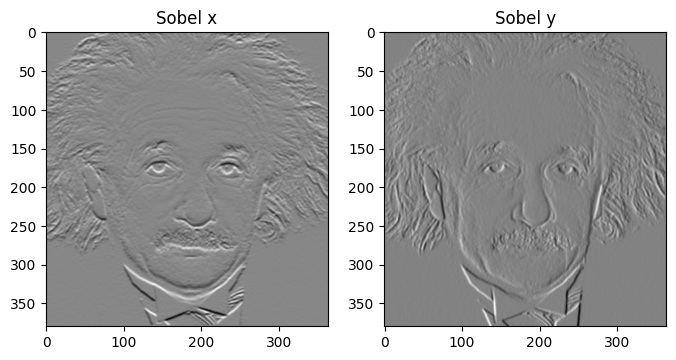

In [205]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/einstein.png", cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

imsx = cv.filter2D(img, cv.CV_32F, sobel_x)
imsy = cv.filter2D(img, cv.CV_32F, sobel_y)

fig, ax = plyt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(imsx, cmap ='gray')
ax[0].set_title("Sobel x")

ax[1].imshow(imsy, cmap = 'gray')
ax[1].set_title("Sobel y")

In [179]:
def sobel_function(img, filter):
    M, N = img.shape
    img_filter = np.zeros((M, N), dtype= np.float32)
    for i in range(1, M-1):
        for j in range(1, N-1):
            sum = 0
            for row in range(3):
                for col in range(3):
                    sum = sum + img[i - 1 + row, j - 1 + col]*filter[row, col]
            img_filter[i, j] = sum
    return img_filter

Text(0.5, 1.0, 'Sobel y')

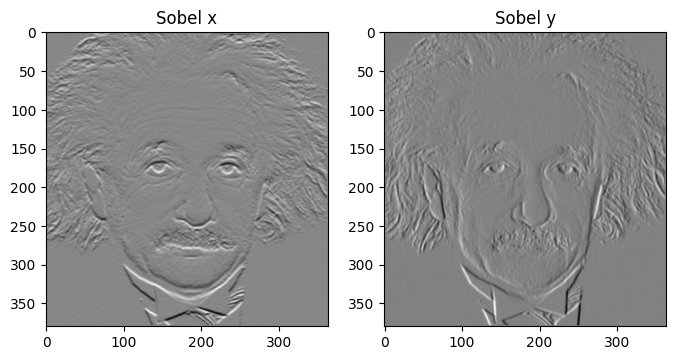

In [180]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/einstein.png", cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

imsx = sobel_function(img, sobel_x)
imsy = sobel_function(img, sobel_y)

fig, ax = plyt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(imsx, cmap ='gray')
ax[0].set_title("Sobel x")

ax[1].imshow(imsy, cmap = 'gray')
ax[1].set_title("Sobel y")

Text(0.5, 1.0, 'Sobel final y filter')

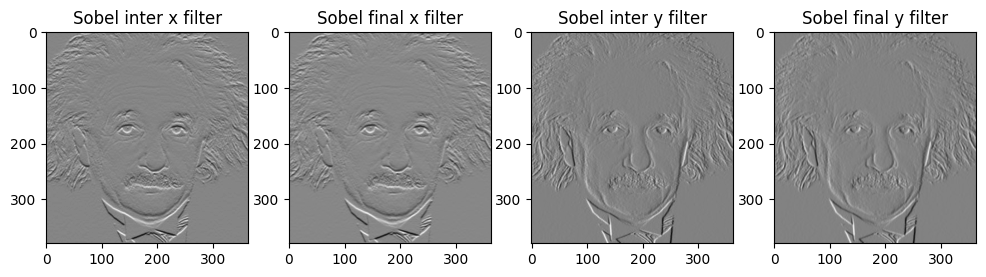

In [210]:
img = cv.imread("E:/UOM/UOM ACA 5/Computer Vision/Assignment/Ass1/a1images/a1images/einstein.png", cv.IMREAD_GRAYSCALE)

sobel_y_inter = np.array([[-1, 0, 1]])
sobel_y_final = np.array([[1], [2], [1]])

sobel_x_final = np.array([[1, 2, 1]])
sobel_x_inter = np.array([[-1], [0], [1]])

ims_inter_x = cv.filter2D(img, cv.CV_32F, sobel_x_inter)      
ims_final_x = cv.filter2D(ims_inter_x, cv.CV_32F, sobel_x_final)

ims_inter_y = cv.filter2D(img, cv.CV_32F, sobel_y_inter)      
ims_final_y = cv.filter2D(ims_inter_y, cv.CV_32F, sobel_y_final)

fig, ax = plyt.subplots(1, 4, figsize=(12, 10))
ax[0].imshow(ims_inter_x, cmap ='gray')
ax[0].set_title("Sobel inter x filter")

ax[1].imshow(ims_final_x, cmap = 'gray')
ax[1].set_title("Sobel final x filter")

ax[2].imshow(ims_inter_y, cmap ='gray')
ax[2].set_title("Sobel inter y filter")

ax[3].imshow(ims_final_y, cmap = 'gray')
ax[3].set_title("Sobel final y filter")